In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas.plotting
import math
%matplotlib inline

In [10]:
data = pd.read_csv('churn-prediction.csv')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  float64
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [12]:
categorical = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numerical = [x for x in data.columns.to_list() if x not in categorical]

print(numerical)

['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [13]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,3.900000e+01,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,4.400000e+01,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,3.600000e+01,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3.400000e+01,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,2.100000e+01,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,4.000000e+01,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,2.500000e+01,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,3.600000e+01,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,2.147484e+09,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [14]:
data.isna().any()

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

In [15]:
hunters_v = data.iloc[:,-5:]

In [16]:
hunters_v

,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.335,1144,42,1.625,0.061
1,1.541,1291,33,3.714,0.105
2,2.594,1887,20,2.333,0.000
3,1.405,1171,20,2.333,0.760
4,2.175,816,28,2.500,0.000
...,...,...,...,...,...
10122,0.703,15476,117,0.857,0.462
10123,0.804,8764,69,0.683,0.511
10124,0.819,10291,60,0.818,0.000
10125,0.535,8395,62,0.722,0.000


In [17]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


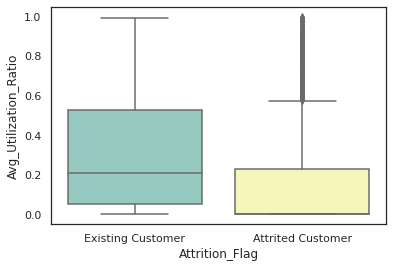

In [18]:
sns.boxplot(data=data, x="Attrition_Flag", y="Avg_Utilization_Ratio", palette="Set3")
plt.show()

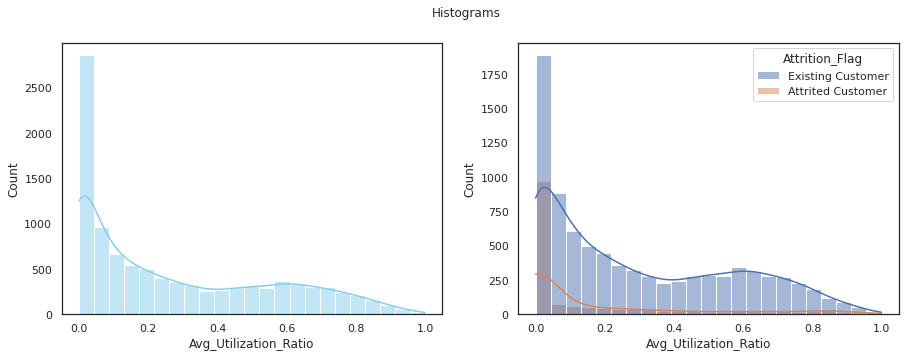

skew: 0.7179016418496336


In [19]:
from scipy.stats import skew

figure, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
figure.suptitle('Histograms')

sns.histplot(ax =axes[0], data=data, x="Avg_Utilization_Ratio", color="skyblue", label="Avg Utilization Ratio", kde=True)
sns.histplot(ax =axes[1],data=data, x="Avg_Utilization_Ratio",hue='Attrition_Flag', color="skyblue", label="Avg Utilization Ratio", kde=True)
plt.show()

#no scaling


print('skew:', skew(data["Avg_Utilization_Ratio"]))

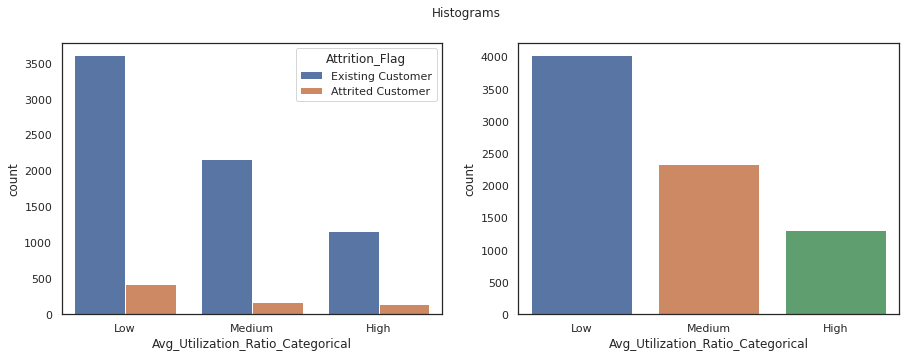

In [20]:
bin_=max(data["Avg_Utilization_Ratio"])/3
data["Avg_Utilization_Ratio_Categorical"] =pd.cut(data.Avg_Utilization_Ratio,bins = [0,bin_,(bin_*2),(bin_*3+.20),], labels = ["Low","Medium",'High'])
#data["Total_Trans_Amt_Categorical"] =pd.cut(data.Avg_Utilization_Ratio, bins = [0,3000,6000,10800,max(data["Total_Trans_Amt"])], labels = ["Low","Medium",'High', 'Baller'])


figure, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
figure.suptitle('Histograms')

sns.countplot(ax = axes[1],x = "Avg_Utilization_Ratio_Categorical", data=data)

sns.countplot(ax = axes[0], x = "Avg_Utilization_Ratio_Categorical", data=data, hue='Attrition_Flag')

plt.show()



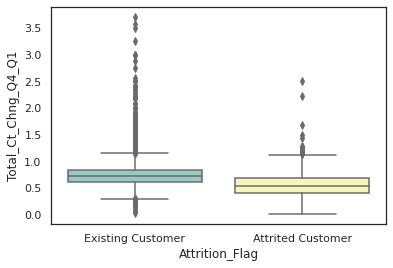

In [21]:
sns.boxplot(data=data, x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", palette="Set3")
plt.show()



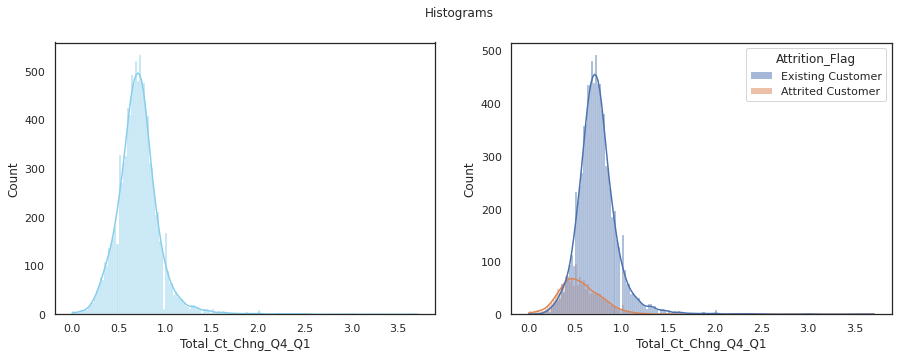

In [22]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
figure.suptitle('Histograms')

sns.histplot(ax =axes[0], data=data, x="Total_Ct_Chng_Q4_Q1", color="skyblue", label="Total_Ct_Chng_Q4_Q1", kde=True)
sns.histplot(ax =axes[1],data=data, x="Total_Ct_Chng_Q4_Q1",hue='Attrition_Flag', color="skyblue", label="Total_Ct_Chng_Q4_Q1", kde=True)
plt.show()

#standarize scaler

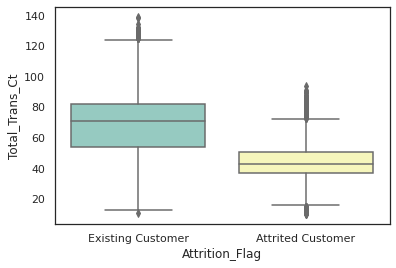

In [23]:
sns.boxplot(data=data, x="Attrition_Flag", y="Total_Trans_Ct", palette="Set3")
plt.show()

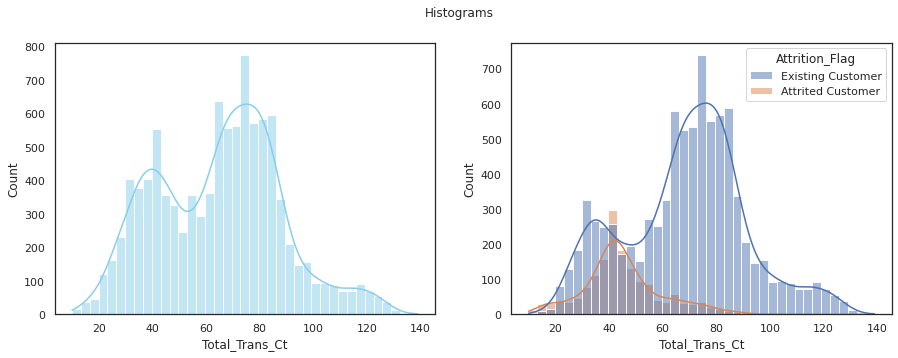

skew: 0.1536503056777963


In [24]:
from sklearn.preprocessing import MinMaxScaler


figure, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
figure.suptitle('Histograms')

sns.histplot(ax =axes[0], data=data, x="Total_Trans_Ct", color="skyblue", label="Total_Trans_Ct", kde=True)
sns.histplot(ax =axes[1],data=data, x="Total_Trans_Ct",hue='Attrition_Flag', color="skyblue", label="Total_Trans_Ct", kde=True)
plt.show()

print('skew:', skew(data["Total_Trans_Ct"]))



#min max scaler

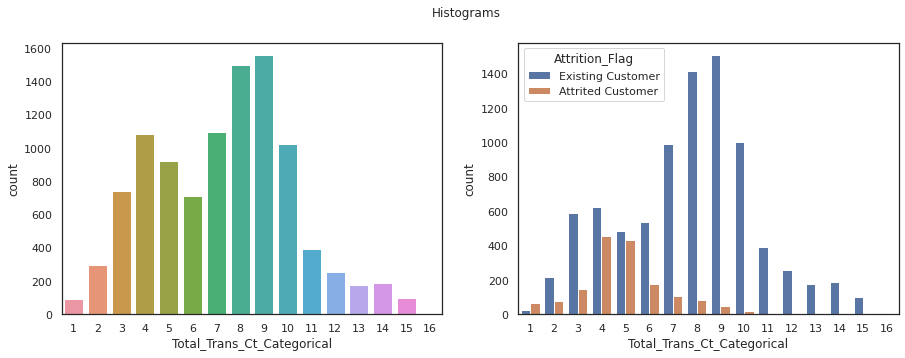

In [43]:
bin_=max(data["Avg_Utilization_Ratio"])/3
data["Total_Trans_Ct_Categorical"] =pd.cut(data.Total_Trans_Ct,bins = 16, labels = range(1,17))
#data["Total_Trans_Amt_Categorical"] =pd.cut(data.Avg_Utilization_Ratio, bins = [0,3000,6000,10800,max(data["Total_Trans_Amt"])], labels = ["Low","Medium",'High', 'Baller'])


figure, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
figure.suptitle('Histograms')

sns.countplot(ax = axes[0],x = "Total_Trans_Ct_Categorical", data=data)

sns.countplot(ax = axes[1], x = "Total_Trans_Ct_Categorical", data=data, hue='Attrition_Flag')

plt.show()


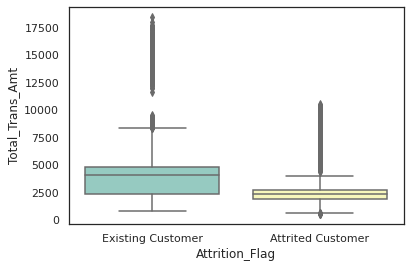

In [25]:
sns.boxplot(data=data, x="Attrition_Flag", y="Total_Trans_Amt", palette="Set3")
plt.show()

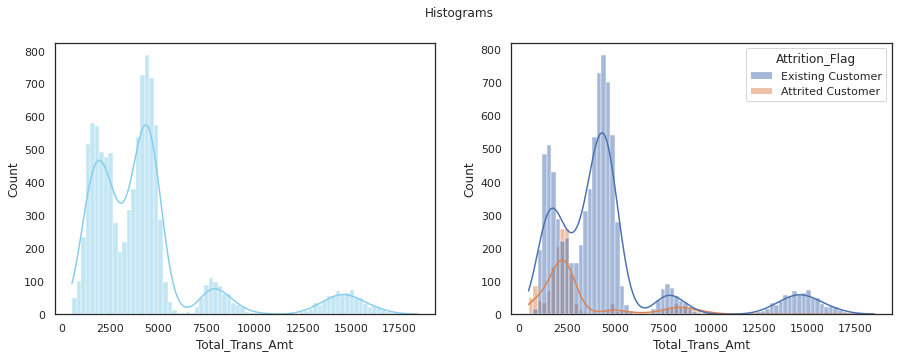

18484

In [26]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
figure.suptitle('Histograms')

sns.histplot(ax =axes[0], data=data, x="Total_Trans_Amt", color="skyblue", label="Total_Trans_Amt", kde=True)
sns.histplot(ax =axes[1],data=data, x="Total_Trans_Amt",hue='Attrition_Flag', color="skyblue", label="Total_Trans_Amt", kde=True)
plt.show()

#create 4 bins for this variable
#robust scaler 
max(data["Total_Trans_Amt"])

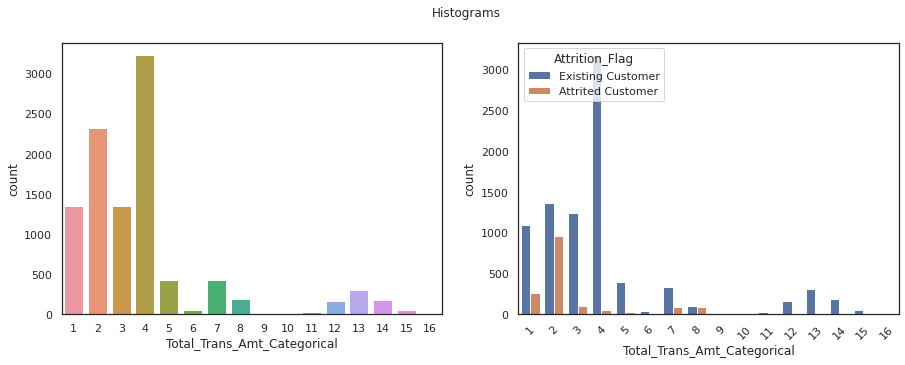

In [40]:
bin_=max(data["Total_Trans_Amt"])/4
#data["Total_Trans_Amt_Categorical"] =pd.cut(data.Total_Trans_Amt,bins = [0,bin_,(bin_*2),(bin_*3),(bin_*4 + 1)], labels = ["Low","Medium",'High', 'Baller'])
data["Total_Trans_Amt_Categorical"] =pd.cut(data.Total_Trans_Amt,bins = 16, labels = range(1,17))




figure, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
figure.suptitle('Histograms')

sns.countplot(ax = axes[0],x = "Total_Trans_Amt_Categorical", data=data)

sns.countplot(ax = axes[1], x = "Total_Trans_Amt_Categorical", data=data, hue='Attrition_Flag')

plt.show()

Create scatter plots for data
Create bins for continous variable

In [28]:
max(data['Credit_Limit'])

34516.0

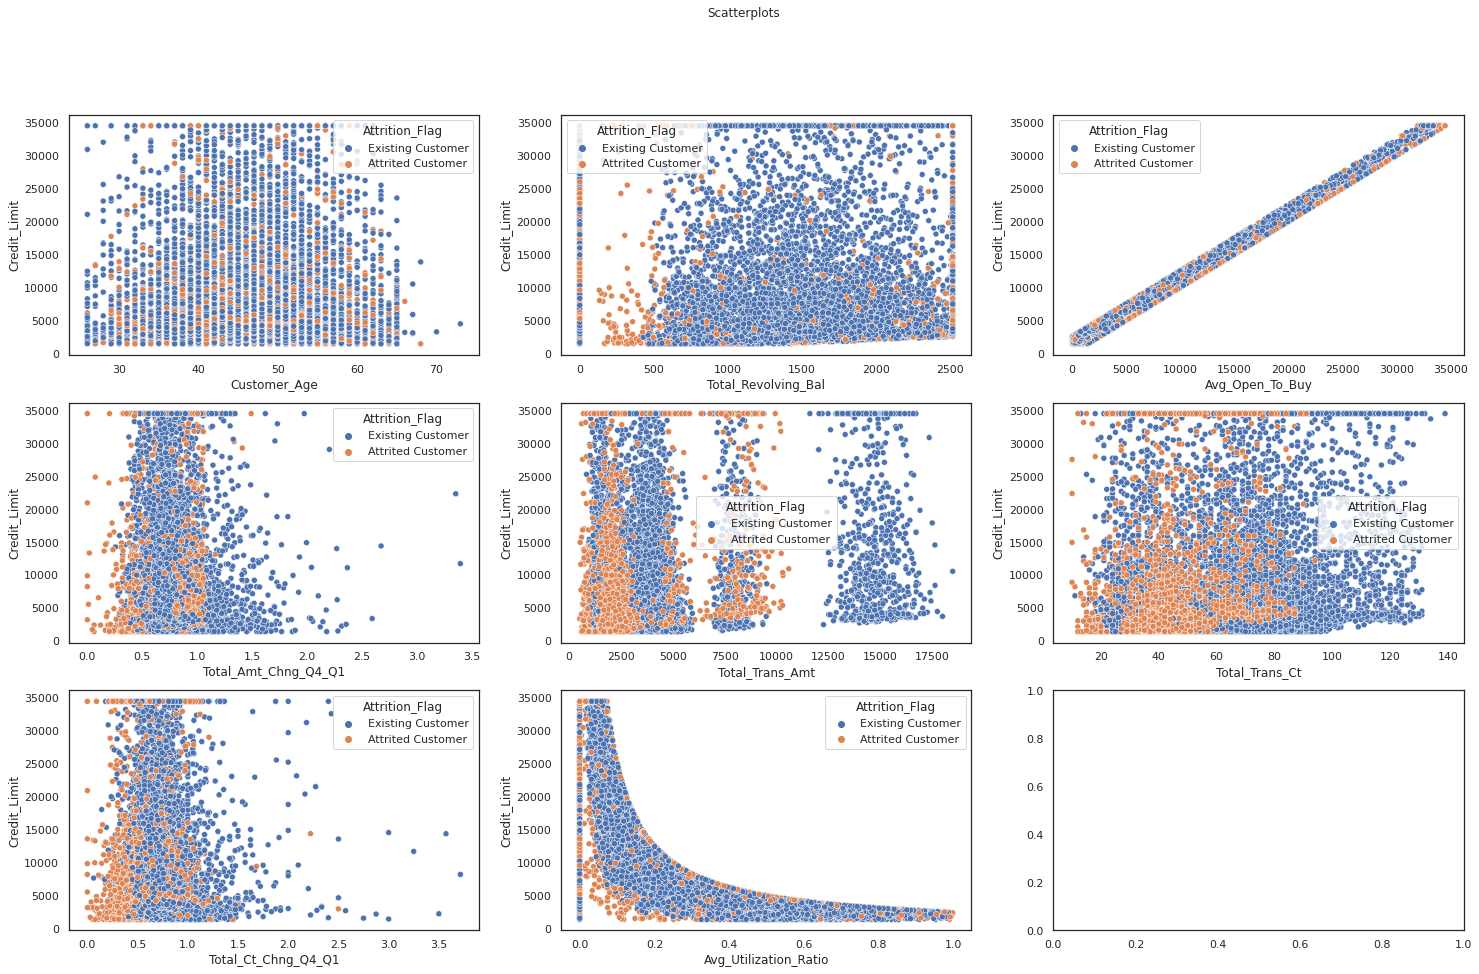

In [29]:
figure, axes = plt.subplots(nrows=3, ncols=3, figsize = (25,15))
figure.suptitle('Scatterplots')


sns.scatterplot(ax = axes[0,0],y='Credit_Limit',x ='Customer_Age', data= data, hue='Attrition_Flag' )
sns.scatterplot(ax = axes[0,1],y='Credit_Limit',x ='Total_Revolving_Bal', data= data, hue='Attrition_Flag')
sns.scatterplot(ax = axes[0,2],y='Credit_Limit',x ='Avg_Open_To_Buy', data= data, hue='Attrition_Flag')
sns.scatterplot(ax = axes[1,0],y='Credit_Limit',x ='Total_Amt_Chng_Q4_Q1', data= data, hue='Attrition_Flag')
sns.scatterplot(ax = axes[1,1],y='Credit_Limit',x ='Total_Trans_Amt', data= data, hue='Attrition_Flag')
sns.scatterplot(ax = axes[1,2],y='Credit_Limit',x ='Total_Trans_Ct', data= data, hue='Attrition_Flag')
sns.scatterplot(ax = axes[2,0],y='Credit_Limit',x ='Total_Ct_Chng_Q4_Q1', data= data, hue='Attrition_Flag')
sns.scatterplot(ax = axes[2,1],y='Credit_Limit',x ='Avg_Utilization_Ratio', data= data, hue='Attrition_Flag')
plt.show()

In [30]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html -- feature selection tool
# non-continuous